# Decision Trees

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import os

In [4]:
path="/content/drive/MyDrive/Colab Notebooks/dataset/train_dt.csv"
train_df = pd.read_csv(path)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
train_df.sample(2).T

,137,4
Loan_ID,LP001491,LP001008
Gender,Male,Male
Married,Yes,No
Dependents,2,0
Education,Graduate,Graduate
Self_Employed,Yes,No
ApplicantIncome,3316,6000
CoapplicantIncome,3500.0,0.0
LoanAmount,88.0,141.0
Loan_Amount_Term,360.0,360.0


![image.png](attachment:image.png)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Missing data

In [8]:
train_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
train_df.isna().sum()/len(train_df)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

#### Drop the missing data for this use-case

In [10]:
train_df.dropna(inplace=True)

In [11]:
train_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Let us understand the relationship between Y and Xi's

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

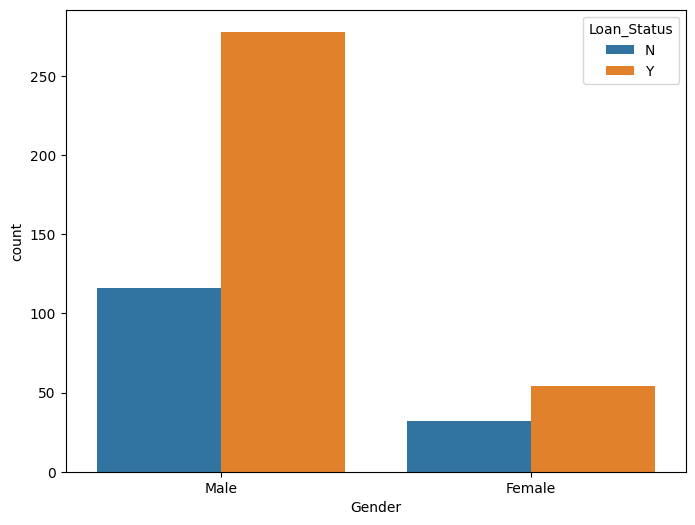

In [13]:
plt.subplots(figsize=(8,6))
sns.countplot(x=train_df['Gender'], hue=train_df['Loan_Status'])
plt.show()

In [14]:
train_df.groupby('Gender').agg(Count_Application = ('Loan_ID', 'nunique')).reset_index()

,Gender,Count_Application
0,Female,86
1,Male,394


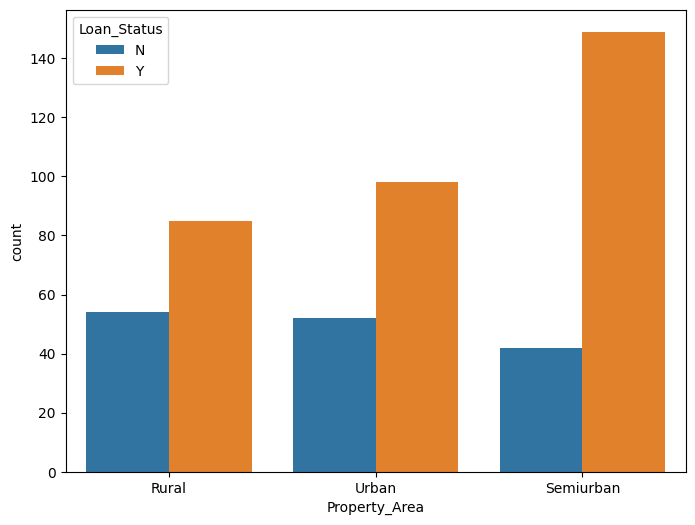

In [15]:
plt.subplots(figsize=(8,6))
sns.countplot(x=train_df['Property_Area'], hue=train_df['Loan_Status'])
plt.show()

- More applicants are from Semi-urban area and their loan aproval numbers are likely to be higher

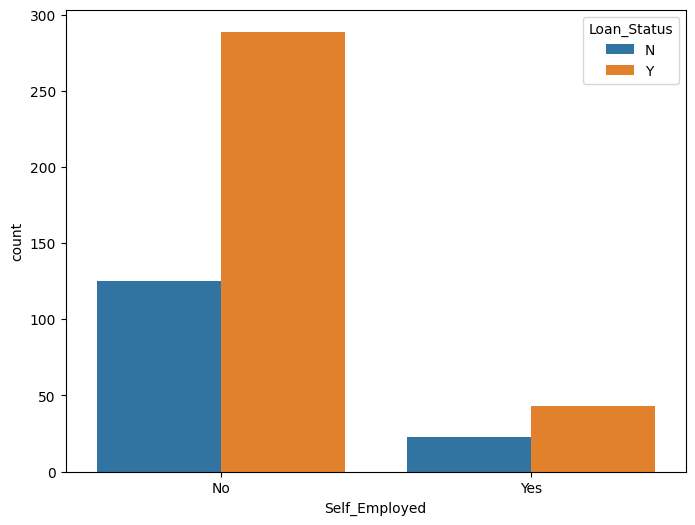

In [16]:
plt.subplots(figsize=(8,6))
sns.countplot(x=train_df['Self_Employed'], hue=train_df['Loan_Status'])
plt.show()

- Number of Loan application and approval is the highest for the salaried folks..like us

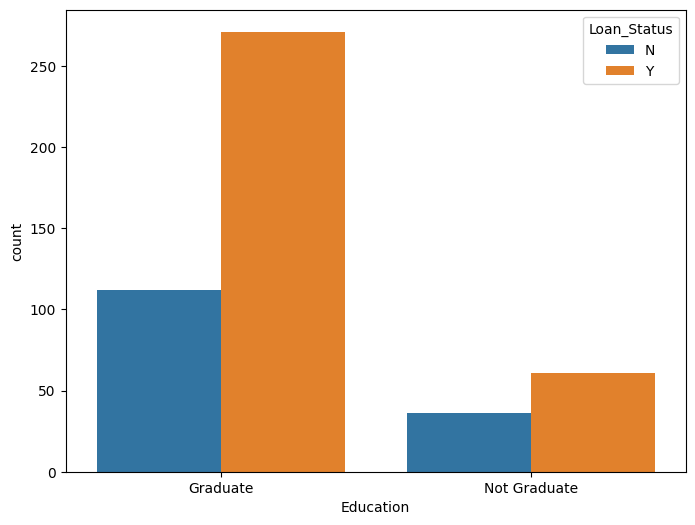

In [17]:
plt.subplots(figsize=(8,6))
sns.countplot(x=train_df['Education'], hue=train_df['Loan_Status'])
plt.show()

### Task - Plot a histogram showing the distribution of income. Add also the number of loans applied and approved

![image.png](attachment:image.png)

### To show the correlation matrix

In [18]:
train_df.corr()

<ipython-input-18-a7a80d20a44e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000


<ipython-input-19-8a5f797d5341>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), annot=True, cmap='Blues')


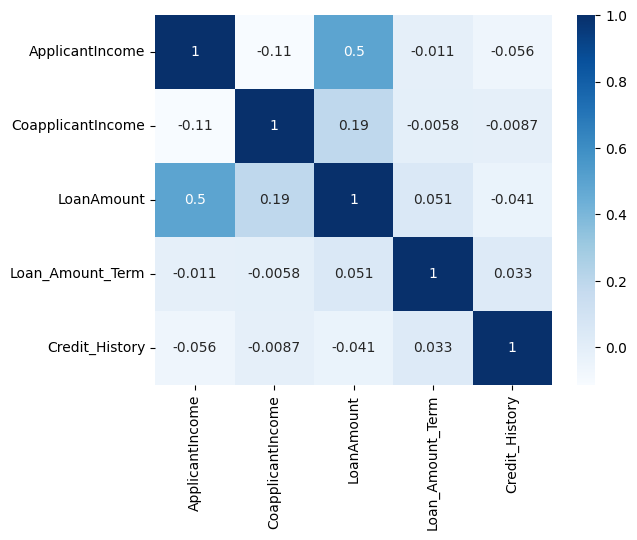

In [19]:
sns.heatmap(train_df.corr(), annot=True, cmap='Blues')
plt.show()

-- Key takeaway: Applicant incomes seems to be `moderately` correlated with the `loan amount`

## Train Test Split

In [20]:
train_df.sample(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
375,LP002211,Male,Yes,0,Graduate,No,4817,923.0,120.0,180.0,1.0,Urban,Y
31,LP001095,Male,No,0,Graduate,No,3167,0.0,74.0,360.0,1.0,Urban,N


In [21]:
from sklearn.model_selection import train_test_split #training and testing dataset split
from sklearn.preprocessing import StandardScaler #Standardizing the data (x-mean)/std. deviation
from sklearn.tree import DecisionTreeClassifier

In [22]:
train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [23]:
select_cols = [ 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']

#### Encoding categorical features

In [24]:
train_df_encoded = pd.get_dummies(train_df[select_cols], drop_first=True)

In [25]:
train_df_encoded.sample(2).T

,378,581
ApplicantIncome,3069.0,1836.0
CoapplicantIncome,0.0,33837.0
LoanAmount,71.0,90.0
Loan_Amount_Term,480.0,360.0
Credit_History,1.0,1.0
Gender_Male,1.0,1.0
Married_Yes,0.0,0.0
Dependents_1,0.0,0.0
Dependents_2,0.0,0.0
Dependents_3+,0.0,0.0


In [26]:
X = train_df_encoded

In [27]:
X.sample(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
326,4917,0.0,130.0,360.0,0.0,1,0,0,0,0,0,0,0,0
276,3993,3274.0,207.0,360.0,1.0,1,1,0,0,0,0,0,1,0


In [28]:
y=train_df['Loan_Status']

In [29]:
y.sample(2)

433    Y
397    Y
Name: Loan_Status, dtype: object

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20, random_state=42)

In [31]:
X_train.shape

(384, 14)

In [32]:
X_test.shape

(96, 14)

## Build the DT Model-1

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, f1_score

In [34]:
tree_mod_1 = DecisionTreeClassifier() # base model is generally run with the deafault settings

![image.png](attachment:image.png)

In [35]:
tree_mod_1

DecisionTreeClassifier()

In [36]:
tree_mod_1.fit(X_train, y_train) #training the model

DecisionTreeClassifier()

**It seems that DT does need OHE/Label Encoding**

Action Item: APC needs to confirm this! - `Confirmed`

- It's possible in library h2o package - in R programming language


https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/decision-tree.html

### Predict the test dataset

In [37]:
pred_values = tree_mod_1.predict(X_test)

In [38]:
pred_values

array(['Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'N', 'Y', 'Y'], dtype=object)

### Performance Metrics

In [ ]:
print('Validation Accuracy', accuracy_score(y_test, pred_values)*100)

Validation Accuracy 71.875


### Plotting Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
cm = confusion_matrix(y_test, pred_values)

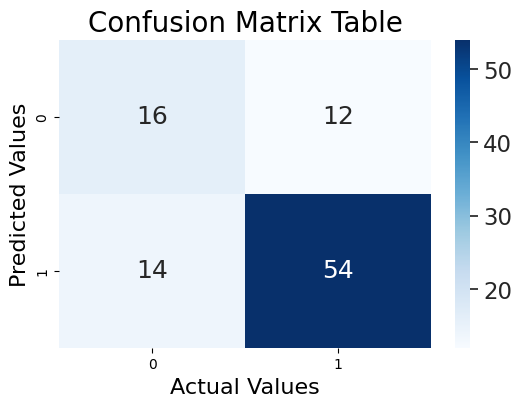

In [41]:
plt.subplots(figsize = (6,4))
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Table", fontsize=20)
plt.xlabel('Actual Values', fontsize=16)
plt.ylabel('Predicted Values', fontsize=16)

plt.show()

In [42]:
y_test.shape

(96,)

In [ ]:
1- (27/96)

0.71875

-- AGENDA:
    
    1. Cross validation score - K-fold CV - Model #2
    2. Hyperparameter Tuning - parameter values and understand it deeply - Couple of Model #3 #4
    3. Comparing different models and freezing one for the deployment
    4. Additional pointer - Entropy
    5. Compare two models with similar settings but different criterion - `gini` and `entropy`
    
    ++ - Reduction in Variance
    ++ - Interpreting the coefficients from LR/LR
    ++ - KS Score
    ++ - Anomaly Detection
    ++ - Semi-supervised

# Random Forest - collection of decision trees